In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

tspan = [0,1]
dt = 0.1
ts = np.arange(tspan[0], tspan[1], dt, dtype="double")
g = 9.81


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

vs:  [ 0.    0.   -9.81]
[[ 5.40302306e-01  0.00000000e+00  8.41470985e-01 -7.72085892e-18]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.41470985e-01  0.00000000e+00  5.40302306e-01 -9.81000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

vs:  [  0.     0.   -19.62]
[[-4.16146837e-01  0.00000000e+00  9.09297427e-01 -3.30397842e-17]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.09297427e-01  0.00000000e+00 -4.16146837e-01 -2.94300000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

vs:  [  0.     0.   -29.43]
[[-9.89992497e-01  0.00000000e+00  1.41120008e-01 -9.20291043e-18]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.41120008e-01  0.00000000e+00 -9.89992497e-01 -5.88600000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

vs:  [  0.     0.   -39.24]
[[-6.53643621e-

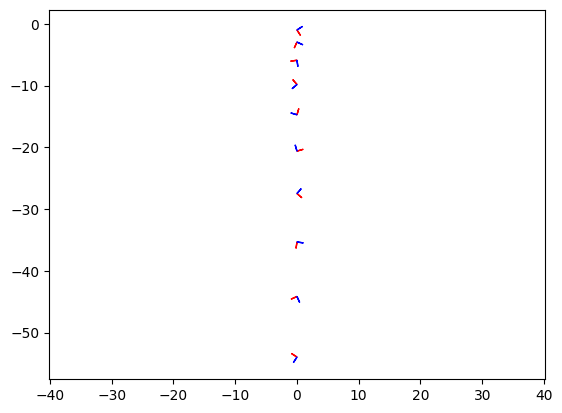

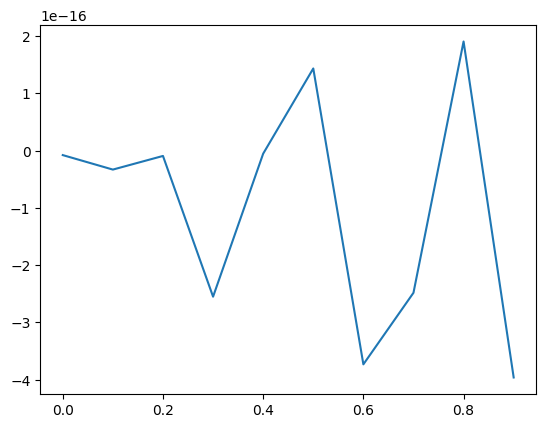

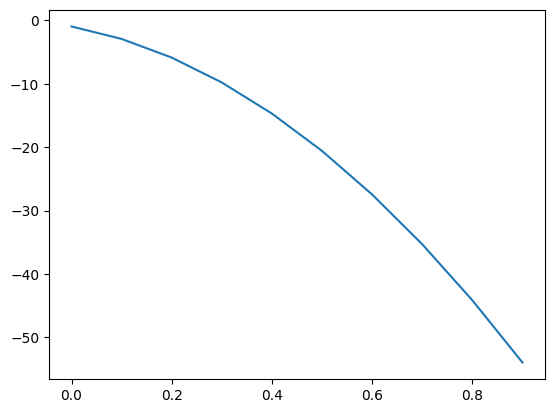

In [7]:
T0 = np.block([[np.eye(3), np.zeros((3,1))], [np.zeros((1,3)), 1]])

# vs = np.array([0,0,-1]).reshape(3,1)
vs = np.array([0,0,0]).reshape(3,1)
wb = np.array([0,10,0])

Tt = T0
xs_ = []
zs_ = []
vs_ = []
ts_ = []
print(Tt, "\n")

plt.figure(1)

for t in ts:
    vs = vs + np.array([0,0,-g]).reshape(3,1)
    print("vs: ", vs.reshape(3))
    rot = R.from_rotvec(wb*dt)
    
    R_ = rot.as_matrix()
    p_ = T0[:3,:3]@vs*dt
    
    R_ = np.block([[rot.as_matrix(), np.zeros((3,1))], [np.array([0,0,0,1])]])
    # T_ = np.block([[R_, R_@p_], [np.zeros((1,3)), 1]])
    # Tt = Tt @ T_
    Tt = Tt @ R_
    P_ = np.block([[np.eye(3), np.transpose(Tt[:3,:3])@vs.reshape(3,1)*dt], [np.zeros((1,3)), 1]])
    Tt = Tt @ P_
    
    print(Tt, "\n")
    rx = np.array([Tt[0,0], Tt[2,0]])
    rz = np.array([Tt[0,2], Tt[2,2]])
    plt.arrow(Tt[0,3], Tt[2,3], rx[0], rx[1], width=0.01, color="r")
    plt.arrow(Tt[0,3], Tt[2,3], rz[0], rz[1], width=0.01, color="b")
    vs_.append(vs[2])
    xs_.append(Tt[0,3])
    zs_.append(Tt[2,3])
    ts_.append(t)
plt.axis("equal")

plt.figure(2)
plt.plot(ts_, xs_)
plt.show()

plt.figure(3)
plt.plot(ts, zs_)
plt.show()